# Assignment: Intermediate Web Scraping with BeautifulSoup and Data Analysis (10 points)

**Background:**  
You have practiced basic web scraping using BeautifulSoup to extract static content from a website. In this assignment, you will go a step further by scraping a more structured dataset (such as a table or a list of items), cleaning the data, and performing simple analysis or visualization.

**Important note:**
You are allowed to use any generative AI tool of your preference, as long as you are explicit about how and when/where you have used it to obtain your answers. You will be graded on the quality of your answers and your *understanding* of the concepts. *NOT on the quality of your code*. For example, you can use AI to come up with code solutions for each task, but a detailed explanation of your choices must be given. This includes but is not limited to: (i) what the code does, (ii) output samples if available, and (iii) your analysis. If your code is generated with AI, you should mention it and the name of the AI model used.

## **Instructions and Point Breakdown**

**1. Choose a Website and Identify Structured Data (2 points)**
- Select a website with a clearly structured dataset (e.g., a table of course listings, a list of books, or a set of product reviews). Explain your choice (i.e., Was the subject of the website relevant to you? Was the structure of the HTML easier to deal with? etc.)
- Briefly describe the dataset you plan to scrape (structure, fields, and why you chose it).

**2. Scrape Data Using BeautifulSoup (3 points)**
- Write Python code to:
  - Fetch the webpage using `requests` (1 point)
  - Parse the HTML and extract at least **three fields** per item (e.g., title, price, rating). Explain your choice of columns. (2 points)

**3. Clean and Organize the Data (2 points)**
- Convert your parsed data into a pandas DataFrame.
- Perform at least **2 cleaning operations**:
  - Convert numeric columns (e.g., remove commas/units)
  - Standardize text formats (e.g, convert to lower case)
  - Handle missing values (e.g, fill with NaN)
  - Anything else that might be needed for your particular data
- Give a brief explanation of the cleaning operations performed

**4. Simple Data Analysis or Visualization (2 points)**
- Perform **one** simple analysis or visualization, such as:
  - Sort and display top items in a category
  - Calculate averages/sums of numeric columns
  - Create a bar chart or pie chart to compare categories using matplotlib or seaborn
- Give a brief description of the plot and/or summarized data.

**5. Reflection and Extension (1 point)**
- In a short paragraph, answer:
  - What challenges did you face compared to the basic example?
  - Are there other Python packages (like Scrapy or Selenium) that might help if the site was more complex?
  - Suggest one AI prompt you could use with Copilot to help automate or improve your code (e.g., “Generate code to handle pagination in BeautifulSoup”).

## **Submission**
- Submit your Jupyter notebook with:
  - Code (well-commented) and descriptions when needed
  - Output (data and visualization)
  - Reflection paragraph

**Grading Rubric:**
| Section                        | Points |
|--------------------------------|--------|
| Website choice & description   |   2    |
| Data scraping (code & fields)  |   3    |
| Data cleaning & organization   |   2    |
| Analysis or visualization      |   2    |
| Reflection & extension         |   1    |
| **Total**                      | **10** |

This assignment builds on your notes by requiring structured data extraction, basic cleaning, and a simple analysis or visualization, while encouraging you to think about next steps and tools for more advanced scraping tasks.

## Sources used:
* Chatgpt (see AI-Usage-Appendix.md)
* https://www.w3schools.com/python/python_json.asp
* https://www.geeksforgeeks.org/python/python-convert-html-characters-to-strings/
* https://www.geeksforgeeks.org/python/create-a-pandas-dataframe-from-list-of-dicts/
* https://www.geeksforgeeks.org/python/apply-a-function-to-single-or-selected-columns-or-rows-in-pandas-dataframe/
* https://www.geeksforgeeks.org/python/how-to-plot-value-counts-in-pandas/

# 1. Choose a Website and Identify Structured Data (2 points)
* Originally, I wanted to work with [Goodreads Top 100: Standalones Edition Highest Rated...](https://www.goodreads.com/list/show/191616.Goodreads_Top_100_Standalones_Edition_Highest_Rated_Standalones_on_Goodreads_with_at_least_10_000_Ratings) but I didn't like the way the various book titles, authors, ratings, etc. were ALL nestled inside classes with very specific names so I decided to go with [100 Best Animated Movies of All Time
](https://www.gamedesigning.org/best-animated-movies/) because animated movies are also something I've always enjoyed learning and creating myself. The website is structured very basically (such as using a few `<h3>` or `<li>` tags) and less nestling when it comes to structuring each movie data.
* I am planning to scrape the following from each animation movie on the website:
> * *Title* 
> * *Avg rating*  
> * *Description*

## Installs & Imports

In [3]:
!pip install beautifulsoup4 requests -q

In [4]:
# Webscrapping Libraries
from pprint import pprint # Pretty-prints data structures
from bs4 import BeautifulSoup # Parses HTML
from urllib.request import urlopen # Opens URLs
from urllib.parse import urljoin, urlparse # More sophisticated link extraction by category

# Parsing/cleaning data Libraries
import json
import pandas
import numpy
import html

# Data visualization Libraries 
import matplotlib.pyplot as plt

# Error-handling Libraries 
import time
import random
from requests.exceptions import RequestException

# user-agent headers Libraries 
import requests

# *2. Scrape Data Using BeautifulSoup (3 points)*

In [5]:
def get_parsed_html_content(url_to_scrape: str):
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url_to_scrape, headers=headers)
    print("status =", response.status_code)  # Check if the request was successful
    html_content_in_url = response.text
    return BeautifulSoup(html_content_in_url, "html.parser")


URL = "https://www.imdb.com/list/ls507734871/"
parsed_html_content = get_parsed_html_content(URL)
pprint(parsed_html_content.prettify()[:5000])

status = 200
('<!DOCTYPE html>\n'
 '<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" '
 'xmlns:og="http://opengraphprotocol.org/schema/">\n'
 ' <head>\n'
 '  <meta charset="utf-8"/>\n'
 '  <meta content="width=device-width" name="viewport"/>\n'
 '  <script>\n'
 "   if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }\n"
 '  </script>\n'
 '  <script>\n'
 "   window.addEventListener('load', (event) => {\n"
 "        if (typeof window.csa !== 'undefined' && typeof window.csa === "
 "'function') {\n"
 "            var csaLatencyPlugin = window.csa('Content', {\n"
 '                element: {\n'
 "                    slotId: 'LoadTitle',\n"
 "                    type: 'service-call'\n"
 '                }\n'
 '            });\n'
 "            csaLatencyPlugin('mark', 'clickToBodyBegin', 1756657638021);\n"
 '        }\n'
 '    })\n'
 '  </script>\n'
 '  <title>\n'
 '   Best Animated Movies 2016-2024\n'
 '  </title>\n'
 '  <meta content="" data-id="main" name="desc

In [6]:
json_data = parsed_html_content.find("script", type="application/ld+json").get_text() # Find <script> content of type "application/ld+json"
json_dict = json.loads(json_data) # Convert str to json data
animated_movies_desired_data = []

# Fetch each movies' title, rating, and description from json
for i in range(len(json_dict["itemListElement"])): 
    animated_movie_data = json_dict["itemListElement"][i]["item"] 
    animated_movie_desired_data = {"title": animated_movie_data["name"], 
                                   "avg_rating": animated_movie_data["aggregateRating"]["ratingValue"],
                                   "description": animated_movie_data["description"]
                                }
    animated_movies_desired_data.append(animated_movie_desired_data)            
    print(animated_movie_desired_data)

{'title': 'Moana', 'avg_rating': 7.6, 'description': 'In ancient Polynesia, when a terrible curse incurred by the demigod Maui reaches Moana&apos;s island, she answers the Ocean&apos;s call to seek out Maui to set things right.'}
{'title': 'Zootopia', 'avg_rating': 8, 'description': 'In a city of anthropomorphic animals, a rookie bunny cop and a cynical con artist fox must work together to uncover a conspiracy.'}
{'title': 'WolfWalkers', 'avg_rating': 8, 'description': 'A young apprentice hunter and her father journey to Ireland to help wipe out the last wolf pack. But everything changes when she befriends a free-spirited girl from a mysterious tribe rumored to transform into wolves by night.'}
{'title': 'Smallfoot', 'avg_rating': 6.6, 'description': 'When a Yeti discovers a human and his fellow Yeti refuse to believe humans exist, he embarks on an journey to find the creature that can put him back in his community&apos;s good graces.'}
{'title': 'Luck', 'avg_rating': 6.4, 'description

# *3. Clean and Organize the Data (2 points)*
**Cleaning operations**:
1. Convert all float ratings to int ratings by rounding via `round()`
2. Convert all special escape characters in the description text to readable characters.

In [7]:
movies_dataframe = pandas.DataFrame.from_dict(animated_movies_desired_data)

In [8]:
# Clearning operation #1: Rounding
print("Converting float ratings to int ratings via round() example:")
print("Original:", animated_movies_desired_data[0]["avg_rating"])
print("Rounded: ", round(animated_movies_desired_data[0]["avg_rating"])) # Rounded rating

movies_dataframe["avg_rating"] = numpy.round(movies_dataframe["avg_rating"])


# Cleaning operation #2: Reconvert special characters to readable format
print("\nConvert all special escape characters in the description text to readable characters example:")
print("Original:", animated_movies_desired_data[0]["description"])
print("Readable:", html.unescape(animated_movies_desired_data[0]["description"])) # Readable description text

movies_dataframe["description"] = movies_dataframe["description"].apply(html.unescape)

Converting float ratings to int ratings via round() example:
Original: 7.6
Rounded:  8

Convert all special escape characters in the description text to readable characters example:
Original: In ancient Polynesia, when a terrible curse incurred by the demigod Maui reaches Moana&apos;s island, she answers the Ocean&apos;s call to seek out Maui to set things right.
Readable: In ancient Polynesia, when a terrible curse incurred by the demigod Maui reaches Moana's island, she answers the Ocean's call to seek out Maui to set things right.


In [9]:
movies_dataframe

,title,avg_rating,description
0,Moana,8.0,"In ancient Polynesia, when a terrible curse in..."
1,Zootopia,8.0,"In a city of anthropomorphic animals, a rookie..."
2,WolfWalkers,8.0,A young apprentice hunter and her father journ...
3,Smallfoot,7.0,When a Yeti discovers a human and his fellow Y...
4,Luck,6.0,The curtain is pulled back on the millennia-ol...
5,Finding Dory,7.0,Friendly but forgetful blue tang Dory begins a...
6,Nezha: Mo tong jiang shi,7.0,"Born with unique powers, a boy is recruited to..."
7,Wish Dragon,7.0,Determined teen Din is longing to reconnect wi...
8,Bai She: Yuan qi,7.0,A love story between a snake spirit and a snak...
9,Beavis and Butt-Head Do the Universe,7.0,"After a ""creative"" judge sentences them to spa..."


# *4. Simple Data Analysis or Visualization (2 points)*
The "Movie Rating Occurrences" bar chart below displays the number of occurrences given to each rounded rating score. Since the website already lists only the "Best Animated Movies 2016-2024", all of the rounded rating scores fall within the higher 6-8 range. 

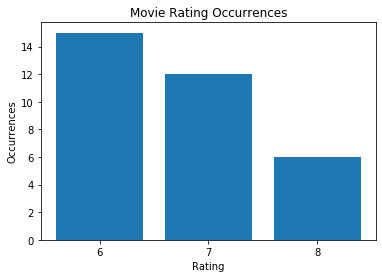

In [10]:
avg_ratings = movies_dataframe["avg_rating"]
rating_counts = avg_ratings.value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values)
plt.title("Movie Rating Occurrences")
plt.xlabel("Rating")
plt.ylabel("Occurrences")
plt.xticks(rating_counts.index)
plt.show()


# *5. Reflection and Extension (1 point)* 
*  The main challenge faced was the fact that the primary content were all stored in the `<script>` tag via json format. It wasn't explained in the practice jupyter notebook on how to handle this so I prompted ChatGPT help me: "*How to web-scrape one `<script type="application/ld+json">` using BeautifulSoup?*" 
* If a website is more complex, i.e. the website is dynamic and has all main content loaded using javascript instead of static HTML, Selenium, as described in this [Geeks for Geeks tutorial](https://www.geeksforgeeks.org/python/scrape-content-from-dynamic-websites/), is a better tool to automatically handle ChromeDriver via webdriver-manager.
* An AI prompt to automate/improve my code could be: "*Given [my_code], what is one way that this webscraping and data processing code could be simplified? Or made to run more efficiently?*"